<a href="https://colab.research.google.com/github/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/NLP_capstone_data')
os.listdir('.')

['Reviews.csv',
 'Amazon_reviews_processed.csv',
 'Amazon_reviews_cleaned_finalform.csv',
 'Amazon_reviews_after_sentiment.csv']

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('Amazon_reviews_after_sentiment.csv')
df.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,1,0,164,6.2,1,0.42,0.40
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,0,136,6.6,0,0.22,0.76
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,42,18,0,2,0,285,6.1,1,0.19,0.55
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,15,5,0,4,0,128,6.2,0,0.15,0.65
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,12,5,0,0,0,83,5.5,1,0.46,0.60


In [5]:
df= df.drop(['UserId', 'Summary', 'Time',"ProductId"], axis=1)
df.head()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,1,1,1,5,bought several vitality canned dog food produc...,21,3,0,1,0,164,6.2,1,0.42,0.40
1,2,0,0,1,product arrived labeled jumbo salted peanutsth...,12,7,0,0,0,136,6.6,0,0.22,0.76
2,3,1,1,4,confection around centuries light pillowy citr...,42,18,0,2,0,285,6.1,1,0.19,0.55
3,4,3,3,2,looking secret ingredient robitussin believe f...,15,5,0,4,0,128,6.2,0,0.15,0.65
4,5,0,0,5,great taffy great price wide assortment yummy ...,12,5,0,0,0,83,5.5,1,0.46,0.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392718 entries, 0 to 392717
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      392718 non-null  int64  
 1   HelpfulnessNumerator    392718 non-null  int64  
 2   HelpfulnessDenominator  392718 non-null  int64  
 3   Score                   392718 non-null  int64  
 4   Text                    392717 non-null  object 
 5   stopwords               392718 non-null  int64  
 6   punctuation             392718 non-null  int64  
 7   numerics                392718 non-null  int64  
 8   upper                   392718 non-null  int64  
 9   word_count              392718 non-null  int64  
 10  char_count              392718 non-null  int64  
 11  avg_word                392718 non-null  float64
 12  Good_reviews            392718 non-null  int64  
 13  polarity                392718 non-null  float64
 14  subjectivity        

In [0]:
df['Text']= df['Text'].astype(str)


### **Create document term matrix with TF-IDF**


### Split Train and Test data

In [8]:
from sklearn.model_selection import train_test_split

y= df.Good_reviews.values 
X= df.Text

X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.33, random_state = 820) 


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(263121,) (263121,)
(129597,) (129597,)


### **Scale the data with Standard Scaler**

In [0]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train= sc.fit_transform(X_train)
#X_test= sc.transform(X_test)

### Convert reviews to a matrix of TF-IDF features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfi = TfidfVectorizer(ngram_range=(1,3), max_features = 2000)

X_train_tfi = tfi.fit_transform(X_train).toarray() 
X_test_tfi = tfi.transform(X_test).toarray() 

Now, the data is ready for deploying machine learning models for prediction.

## **Naive Bayes with Gaussian Method**

Deploying Naive Bayes Models

https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes
Scikit-learn page suggest to evaluate different Naive Bayes models, if time permits.

In this study, I will evaluate:

1.   Gaussian Method
2.   Multinominal method
3.   Bernoulli Method

In [112]:
# Fitting naive bayes to the training set with Gaussian Method
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
  
classifier_GNB = GaussianNB(); 
classifier_GNB.fit(X_train_tfi, y_train) 
cv_gaussian= classifier_GNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_GNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 


array([[23338,  5251],
       [25092, 75916]])

Text(89.18, 0.5, 'Predicted label')

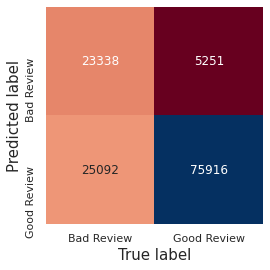

In [113]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

####Model performance

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.77
Precision score: 0.94
Recall score: 0.75
F1 score: 0.77




---
## **Multinomial Naive Bayes**



In [76]:
# Fitting naive bayes to the training set with Multinomial Method
from sklearn.naive_bayes import MultinomialNB
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train_tfi, y_train) 
cv_mn = classifier_MNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_MNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[  7352,  21237],
       [   959, 100049]])

Text(89.18, 0.5, 'Predicted label')

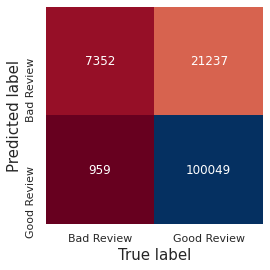

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

#####Model's performance

In [37]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.82


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))


Accuracy score: 0.83
Precision score: 0.82
Recall score: 0.99
F1 score: 0.83


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

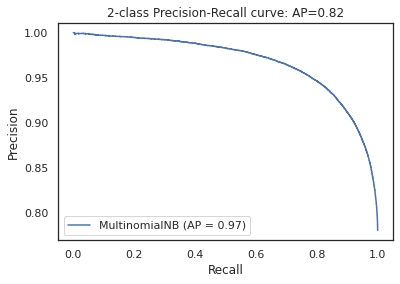

In [89]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier_MNB, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))



---

## **Bernoulli Naive Bayes**



In [79]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix 
  
classifier_BNB = BernoulliNB(); 
classifier_BNB.fit(X_train_tfi, y_train) 
cv_ber= classifier_BNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_BNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 


array([[18058, 10531],
       [10898, 90110]])

Text(89.18, 0.5, 'Predicted label')

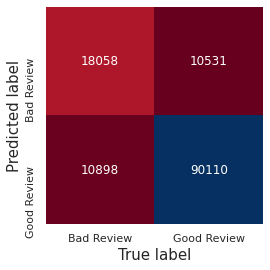

In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.83
Precision score: 0.90
Recall score: 0.89
F1 score: 0.83


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

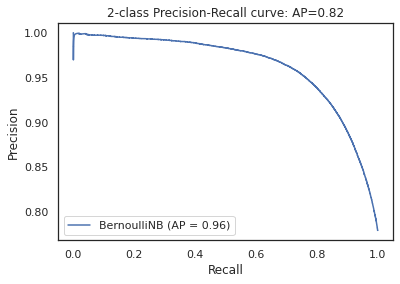

In [87]:
sns.set(style="white", color_codes=True)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier_BNB, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## **Complement Naive Bayes**

In [91]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix 
  
classifier_CNB = ComplementNB() 
classifier_CNB.fit(X_train_tfi, y_train) 
cv_CNB= classifier_CNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_CNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[23608,  4981],
       [18747, 82261]])

Text(89.18, 0.5, 'Predicted label')

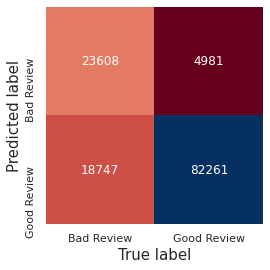

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.82
Precision score: 0.94
Recall score: 0.81
F1 score: 0.82


#####Precision-Recall Curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

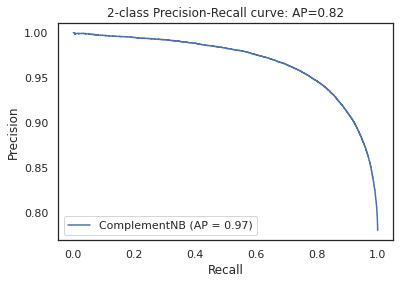

In [94]:
sns.set(style="white", color_codes=True)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier_CNB, X_test_tfi, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))



---

# **Logistic Regression Model Fitting**

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfi, y_train)
cv_logreg= logreg.fit(X_train_tfi, y_train)

# predicting test set results 
y_pred = logreg.predict(X_test_tfi) 

Text(89.18, 0.5, 'Predicted label')

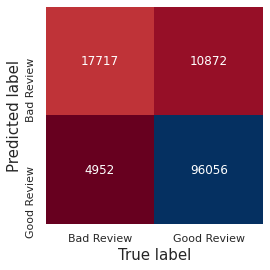

In [96]:
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

#####Model performance evaluation

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.88
Precision score: 0.90
Recall score: 0.95
F1 score: 0.88


Receiver Operating Characteristic (ROC)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [99]:
# Get predicted probabilities for each classifiers from fitted classifiers
y_score1 = cv_gaussian.predict_proba(X_test_tfi)[:,1]
y_score2 = cv_mn.predict_proba(X_test_tfi)[:,1]
y_score3 = cv_ber.predict_proba(X_test_tfi)[:,1]
y_score4 = cv_CNB.predict_proba(X_test_tfi)[:,1]
y_score5 = cv_logreg.predict_proba(X_test_tfi)[:,1]

# Plot Receiving Operating Characteristic Curve
  # Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)

print('roc_auc_score for Gaussian NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score1)))
print('roc_auc_score for Multinominal NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score2)))
print('roc_auc_score for Bernoulli NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score3)))
print('roc_auc_score for Complement NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score4)))
print('roc_auc_score for Logistic Regression: {0:0.2f}'.format (roc_auc_score(y_test, y_score5)))


roc_auc_score for Gaussian NB: 0.84
roc_auc_score for Multinominal NB: 0.90
roc_auc_score for Bernoulli NB: 0.88
roc_auc_score for Complement NB: 0.90
roc_auc_score for Logistic Regression: 0.92


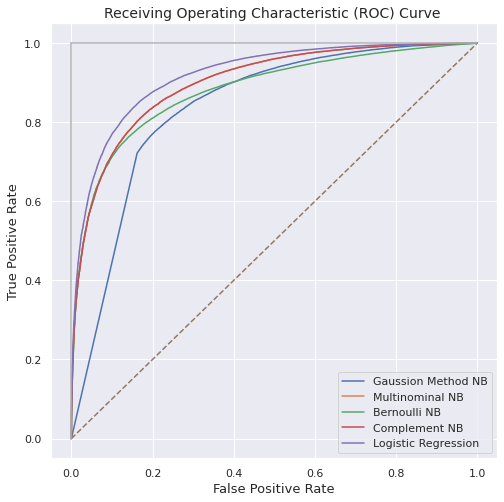

In [101]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Gaussion Method NB")
plt.plot(false_positive_rate2, true_positive_rate2, label="Multinominal NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Bernoulli NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Complement NB")
plt.plot(false_positive_rate5, true_positive_rate5, label="Logistic Regression")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic (ROC) Curve ', fontsize= 14)
plt.legend()
plt.show()

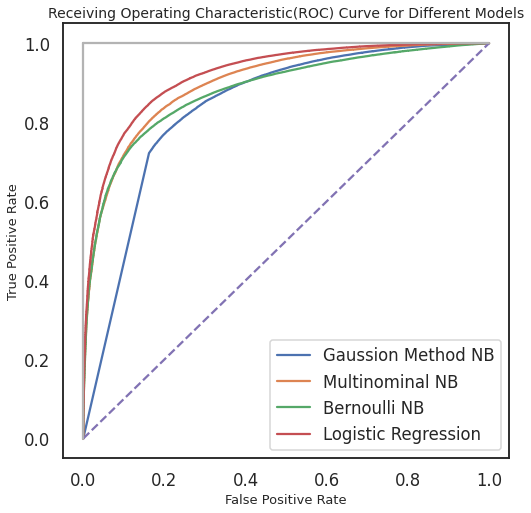

In [176]:
#Same plot with different background color and context parameter
sns.set(style="white", color_codes=True)
sns.set_context("talk")
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Gaussion Method NB")
plt.plot(false_positive_rate2, true_positive_rate2, label="Multinominal NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Bernoulli NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Logistic Regression")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic(ROC) Curve for Different Models', fontsize= 14)
plt.legend()
plt.show()

In [0]:
#Same plot with different background color and context parameter
sns.set(style="white", color_codes=True)
sns.set_context("talk")
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Gaussion Method NB")
plt.plot(false_positive_rate2, true_positive_rate2, label="Multinominal NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Bernoulli NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Logistic Regression")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic(ROC) Curve for Different Models', fontsize= 14)
plt.legend()
plt.show()


sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Gaussion Method NB")
plt.plot(false_positive_rate2, true_positive_rate2, label="Multinominal NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Bernoulli NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Complement NB")
plt.plot(false_positive_rate5, true_positive_rate5, label="Logistic Regression")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic (ROC) Curve ', fontsize= 14)
plt.legend()
plt.show()

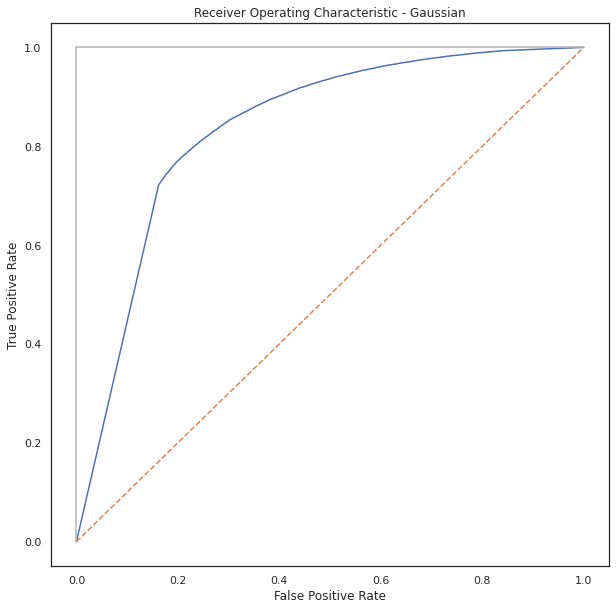

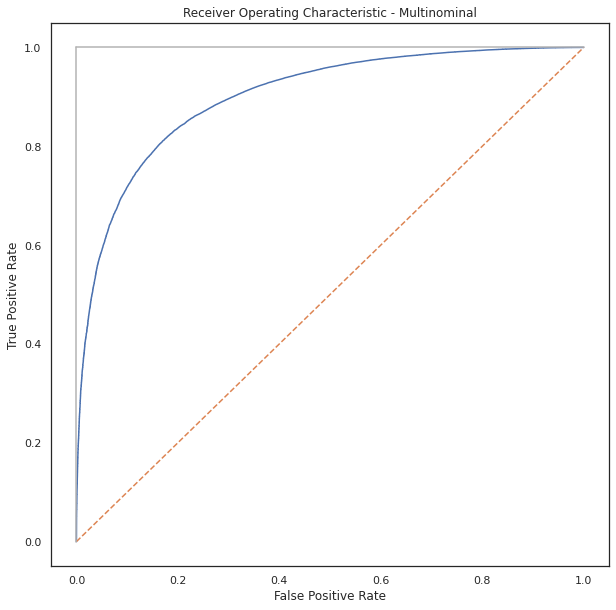

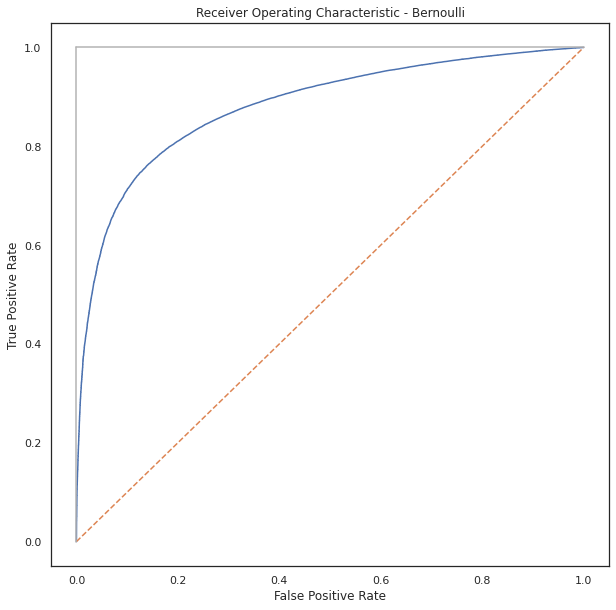

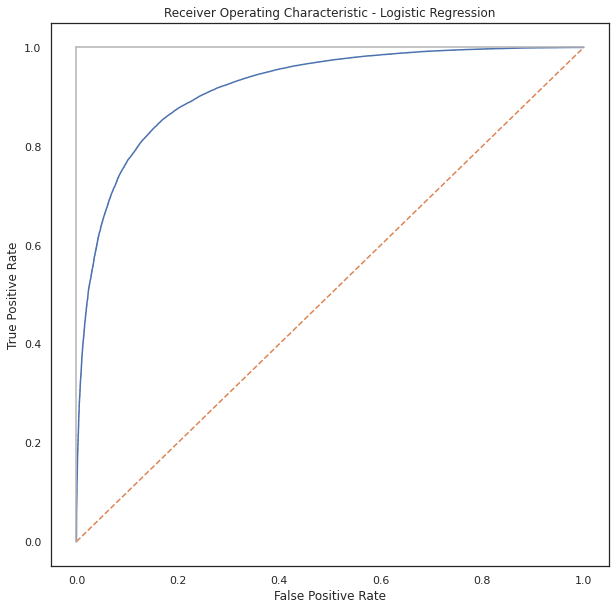

In [165]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gaussian')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Multinominal')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Bernoulli')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Check the results - Sanity Check

In [109]:
#Keep in mind that y_test is now defined for Logisctic Regression which is the best model according to model according to model comparison.
predictions = y_pred

testing_predictions = []
for i in range(len(X_test)):
       if predictions[i] == 1:
        testing_predictions.append(1)
       else:
        testing_predictions.append(0)

check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'review':list(X_test)})
check_df.head()
#Keep in mind that y_test is now defined for Logisctic Regression which is the best model according to model.

,actual_label,prediction,review
0,0,1,review generalization hoof treats indication p...
1,1,1,filling tasty easy use buttercream dam sed was...
2,1,1,tried first time last night excellent added br...
3,0,1,isnt whole lot special stride gum kind got ann...
4,1,1,regularly make flax muffins mix ground flaxmea...


In [116]:
check_df.sample(10)

,actual_label,prediction,review
27205,1,1,best trying keep calories put note jar keep no...
54308,1,0,showed three days yummo havent tasted yet prob...
15041,1,1,hair thick goes past shoulders difficult manag...
7319,1,1,senseo pods delicious cost effective especiall...
104742,0,0,trying liking regular product decided try vari...
71702,1,1,terrific qualityprice ratio superior packaging...
72191,1,1,kitchen farmhouse pancake waffle mix cans pack...
46998,1,0,people demonizing high fructose corn syrup rea...
22782,1,1,husband loves working outside texas heat great...
96361,1,1,nabisco knew didnt put little things give much...


In [123]:
check_df.sample(10)

,actual_label,prediction,review
122103,1,1,one best coffee brands ever tried impressed de...
57426,1,1,soy vay veri veri teriyaki sauce unbelievably ...
24401,0,1,nice natural ingredients however beet juice se...
104874,1,1,wonderful knowing two little dogs favorite tre...
56133,1,0,purchased food referral another dogowner whos ...
103856,0,0,threw country origin listed said packaged usa ...
113872,1,1,twinings best tea blends love decaf breakfast ...
93485,1,1,loved regular shin ramen well sutah ramenbut t...
50462,1,1,using hair lotion eat tablespoons seen small i...
56147,1,1,every box graham crackers ever entered house e...


In [124]:
check_df.loc[(check_df.actual_label ==1) & (check_df.prediction==1)].review.sample(20).to_list()

['product tried true although delicious cereals astounding property calming effect literally anyone eats find enjoying bowl gorilla munch simply laughing jabs may thrown edge another daybr know say box table keeps jimmies stablebr recommended anyone',
 'great product good price fast shipping product retails stores much higher price thats lucky enough find great deal would highly recommend seller',
 'excellent pine apple juice price higher amazon whole foods sells lakewood pine apple juice sale compared amazon price reason per bottle price difference',
 'green mountain french roast closest whole bean ground get k cup tried nearly k cup french roast favorite distinct flavor smoky taste true french roast consider breakfast coffee hot milk love latte bolder dinner satisfy taste coffee mountain coffee french roast kcups keurig brewersa',
 'xylitol best sugar substitute right artificial things like sucralose etc taste weird xylitol clean sugar taste since cavity prone kid nice allow sweetner

In [125]:
check_df.loc[(check_df.actual_label ==0) & (check_df.prediction==0)].review.sample(20).to_list()

['picked buster cube reading positive reviews great toy lots fun holds attention long time put handfull kibble itan amount pup would eat couple bites occupied least minutes would star noisy even carpeted floor thats complaintbr update buster cube didnt make weekend dog able remove center piece proceeded chew room luckily gone couple minutes center piece still sort functional disappointing',
 'worse gas station cappuccino tasted like powder became watered larger cup chose make worth',
 'dear misssir great regret write complain item purchased absolutely flavour inspite cooking regular oven microwave oven well toaster oven per given instructions etc gave horrible odour odour intense turn exhaust fan open doors windows well even neighbours wondered asked smell customer service help contact left pieces outside even squirrel skunk like endup throwing away whole box garbage loss purchase disappointment',
 'crunchy balls candy outside chewy gummy inside sounds clever mostly gross black ones bi

In [185]:
check_df.loc[(check_df.actual_label ==1) & (check_df.prediction==0)].review.sample(50).to_list()

['celsius green tea raspberry acai vitamin enriched beverage contains good stuff none bad stuff sugar aspartame preservatives high fructose corn syrup artificial colors flavors however tradeoff simple flavor drink weak tasting tart aftertaste doesnt taste bad doesnt taste good either drink claim burn calories per give energy think primarily vitamins cant confirm actually burns calories however say drinking product several daysi drank one morningi lose couple pounds bad effects like get energy drinks',
 'received three english breakfast teas instead assortment ordered great tea wrong description kept normally one return things',
 'read reviews bought tasted sample variety pack good taste youre reading youre interested prob taste buy',
 'pros excellent instant coffee better lot brewed coffee elsewherebr cons description order said pack ordered got packs disappointing really upsetting dont plan return since end cost fix one way coffee price paid still pay locally ordered online cant find 



*   'needs tried brands taste disgusting one actually tastes like candy' # Probably customer rated wrong
*    'product taste good prefer product glass container instead plastic product made listed label disappointed' # Hard to differentiate for the model
*    'happy productit advertised larger size actually customer service processed refund issued apology' # Refund item, rating is bad eventhough review is positive
*   'son classmates love however think awful' # Though case for the model
*   'ordered food one dogs favoritesbr last shipment however contained many dented cans instill confidencebr id say dented though far food fine observation quality control complaint ill likely order' # Though case


*   'product joint rescue enjoyed beloved pekinese however expiration date soon disappointing' # Forgiving customers may give high rating, bad review
*    'received three english breakfast teas instead assortment ordered great tea wrong description kept normally one return things', # Forgiving customer





In [188]:
check_df.loc[(check_df.actual_label ==0) & (check_df.prediction==1)].review.sample(50).to_list()

['lavazza coffee crema e gusto goodbut expires monthbr bought four knowing thisyou post expiration dates foodnow three blocks expired coffee great folks',
 'based reiviews purchased creamer loved idea refridgeration tastes great exactly like refrigerated liquid version untill use purchase againi picky morning coffee',
 'live middle nowhere want try new food products read often come amazoncom find products arrive felt duds recently read raving review hungry girl product decided give shot wow good may made corn tasted like rice cake good one plus cracker wrinkly brain appearanceits kind creepy wanting judge gave husband try loves snack foods eat anything tasted couple said dont need bother threw rest box away arent worth calories',
 'anniversary blend coffee starbucks loved itbought kcups regular coffee sorry say good brewed coffee starbucks maybe brewing process enchances flavor',
 'granola okay great awfulbr texture nicebr bit sweet taste almost sickeningly sobr paper thin almond slive

Some examples from upper query:

 'pretty good think really annoying claim bar equals two servings clearly doesnt aside pretty good dont think anyone really eats taste',

 'sweet chocolate taste tried various family members appeal would definately recommend' # This is probably customer mistake

 'bought looking good glutenfree cereal theyre decent great little sweet going take get many boxes' # Customer mistake

 'decent coffee ridiculously overpriced starbucks ashamed charging buck half cup coffee made home' # This is a hard case for the model

 'soup thick pleasant way bland one least favorite cups dr mcdougalls' # This is a hard case for the model

 'expecting spicier regular wasabi peas actually less spicy good flavor would order' # This is a hard case for the model

'make mistake chocolate bar sweet maybe creamy overwhelmed sweetness couldnt taste anything else according label theres sugar within per chocolate decide' # This is a hard case for the model

